In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
labels = ['뽕사부','순대국밥','개구리비빔밥','생고기','서브웨이']
datas = [15,15,30,50,25]
colors = ['gold','blue','red','yellow','green']

- pie chart : 카테고리별 값의 상대적인 비교

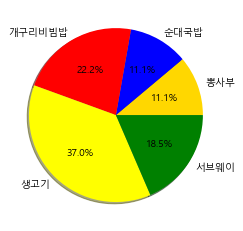

In [11]:
plt.figure()

plt.pie(datas,
       labels=labels,
       colors=colors,
       shadow=True,
       autopct='%1.1f%%')

plt.show()
plt.close()

In [12]:
pieDF = pd.read_csv('./data/auto-mpg.csv',header=None)
pieDF

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [13]:
pieDF.columns =  ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
pieDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [14]:
# 집계를 위한 cnt 변ㅅ 생성
pieDF['cnt'] = 1
display(pieDF)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [17]:
# 제조국가별(origin) 차량대수에 대한 piechart 생성

# 각각의 제조국에 대한 데이터 생성(그룹화)
originDF = pieDF.groupby('origin').sum()
print(originDF.index)
print(originDF.columns)

Int64Index([1, 2, 3], dtype='int64', name='origin')
Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'cnt'],
      dtype='object')


In [18]:
# 인덱스 변경
originDF.index = ['USA','EU','KOREA']
originDF.index

Index(['USA', 'EU', 'KOREA'], dtype='object')

In [19]:
originDF

,mpg,cylinders,displacement,weight,acceleration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOREA,2405.6,324,8114.0,175477.0,1277.6,6118,79


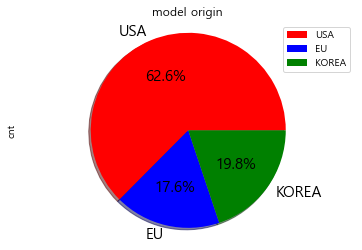

In [37]:
plt.figure()

# 데이터가 리스트(시리즈) 형태로 들어가야함
# 시리즈는 인덱스와 값을 가지기 떄문에 자동으로 라벨생성
originDF['cnt'].plot(kind='pie',
                    autopct = '%1.1f%%',
                    fontsize=15,
                    colors=['red','blue','green'],
                    shadow=True)

plt.title('model origin')
# 범례는 데이터의 인덱스
plt.legend(labels=originDF.index,loc='best')
plt.axis('equal') # 차트를 원형에 가깝게 생성

plt.show()
plt.close()

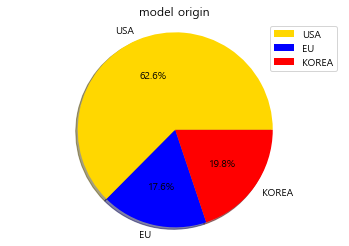

In [36]:
plt.figure()

# 데이터가 리스트(시리즈) 형태로 들어가야함
# 시리즈는 인덱스와 값을 가지기 떄문에 자동으로 라벨생성

# plt.pie(originDF['cnt'],
#        labels=originDF.index,
#        colors=colors,
#        shadow=True,
#        autopct='%1.1f%%')

# 큰 차이없음
plt.pie(originDF['cnt'].values,
       labels=originDF.index,
       colors=colors,
       shadow=True,
       autopct='%1.1f%%')

plt.title('model origin')
# 범례는 데이터의 인덱스
plt.legend(labels=originDF.index,loc='best')
plt.axis('equal') # 차트를 원형에 가깝게 생성

plt.show()
plt.close()

In [55]:
cylindersDF = pieDF.groupby('cylinders').sum()
print(cylindersDF.index)
print(cylindersDF.columns)
cylindersDF.index = ['cyl3','cyl4','cyl5','cyl6','cyl8']

Int64Index([3, 4, 5, 6, 8], dtype='int64', name='cylinders')
Index(['mpg', 'displacement', 'weight', 'acceleration', 'model year', 'origin',
       'cnt'],
      dtype='object')


In [56]:
display(originDF)
display(cylindersDF)

,mpg,cylinders,displacement,weight,acceleration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOREA,2405.6,324,8114.0,175477.0,1277.6,6118,79


,mpg,displacement,weight,acceleration,model year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


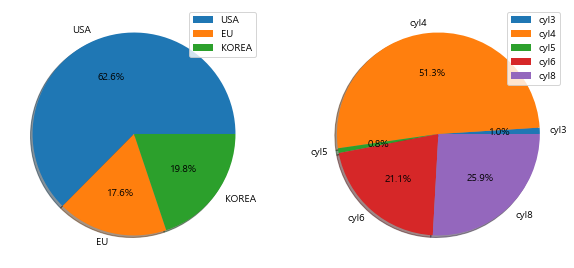

In [70]:
# origin / cylinder별 subplot 생성

fig = plt.figure(figsize=(10,15))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)


ax01.pie(originDF['cnt'],
       labels=originDF.index,
       shadow=True,
       autopct='%1.1f%%')

ax02.pie(cylindersDF['cnt'],
       labels=cylindersDF.index,
       shadow=True,
       autopct='%1.1f%%')

ax01.legend(labels=originDF.index,loc='best')
ax02.legend(labels=cylindersDF.index,loc='best')

plt.show()
plt.close()

- histogram : 구간에 대한 데이터의 집계
- 하나의 변수에 대한 빈도수 시각화

In [72]:
datas = np.random.randn(1000)
datas

array([-1.47691837e+00,  2.03835687e+00,  7.94212144e-01,  1.45984516e+00,
       -4.97394308e-01,  1.10576307e+00, -5.51146780e-01, -3.62549049e-01,
       -1.82087287e+00,  7.04012801e-01, -1.47229615e+00,  1.28950151e-01,
       -7.26121270e-01, -2.17337923e+00, -2.44165531e-01, -2.49573848e-01,
        8.33548966e-01,  3.33585085e-02,  1.72609137e-01,  7.82498742e-01,
       -3.43029646e-01,  6.06049927e-01,  9.87904709e-01,  1.50023204e+00,
       -2.05790919e-01,  6.57061024e-01, -6.58991273e-01, -1.48601600e-01,
       -5.71668967e-01,  1.16938303e+00, -5.34251194e-01,  2.29733257e+00,
       -6.66329888e-01, -2.27497859e-01,  4.65245399e-01, -1.12391812e+00,
        5.55390873e-01,  5.64141163e-01, -2.74178910e-01,  5.91872846e-01,
        2.24507131e+00,  1.61081095e+00, -4.98297222e-01,  1.16931226e+00,
        1.15023418e-01,  5.77578261e-01,  1.09152541e+00,  1.35792659e+00,
       -3.85943104e-01,  8.69613945e-01,  7.75658358e-01, -6.56001374e-01,
       -2.99348412e-01, -

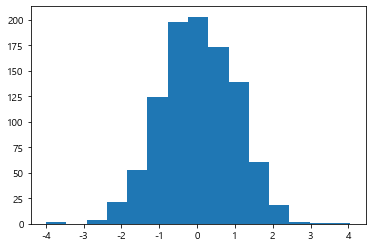

In [75]:
plt.figure()

plt.hist(datas,bins=15) # bins의 크기가 클수록 막대의 수 증가

plt.show()
plt.close()

In [82]:
pieDF['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

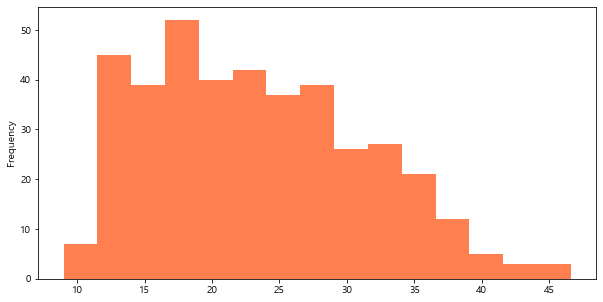

In [83]:
plt.figure()

pieDF['mpg'].plot(kind='hist',bins=15,color='coral',figsize=(10,5))

plt.show()
plt.close()

### koweps_visualization.xlsx[실습]

In [88]:
rowDF = pd.read_excel('./data/koweps_visualization.xlsx')
rowDF.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [93]:
rowDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [313]:
# 문제01
subsetDF = rowDF[['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']]
subsetDF.columns = ['성별','태어난 연도','혼인상태','종교','직종','일한달의 월 평균 임금','7개 권역별 지역구분']
subsetDF

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


<Figure size 432x288 with 0 Axes>

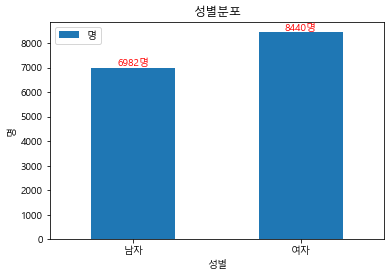

In [314]:
# 데이터 분석 (조사 대상자들에 대한 성별 분포)
# 성별의 데이터 분포 확인
# 1. 필터를 활용한 성별 데이터 추출
# display(subsetDF.filter(['성별']))

# 성별의 값을 남녀로 바꾸고 싶다면?
genderDF = subsetDF.filter(['성별'])

genderDF['성별2'] = np.where(subsetDF.filter(['성별']) == 1, '남자','여자')
genderDF
# np.array -> feature

# 결측값 확인
# genderDF.isna().sum()
         
gender_cnt_df = pd.DataFrame(genderDF['성별2'].value_counts())
gender_cnt_df

# 컬럼이름 변경 rename()
gender_cnt_df.rename(columns={'성별2' : '명'},inplace=True)
gender_cnt_df

# 성별을 비율순으로 정렬
gender_cnt_df.sort_values('명',ascending=True,inplace=True)
gender_cnt_df

# 데이터 시각화
plt.figure()
# plt.grid()

gender_cnt_df.plot(kind='bar',rot=0)

plt.title('성별분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx , value in enumerate(list(gender_cnt_df['명'])) :
    txt = '%d명' % value
    plt.text(idx , value , txt , 
             horizontalalignment = 'center' , 
             verticalalignment = 'bottom' ,
             color = 'red')

plt.show()
plt.close()

In [315]:
gender_cnt_df

,명
남자,6982
여자,8440


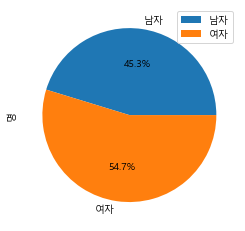

In [316]:
# pid chart

plt.figure()

gender_cnt_df['명'].plot(kind='pie',
                  labels=gender_cnt_df.index,
                   autopct = '%1.1f%%',
                    legend=True)

plt.show()
plt.close()

In [317]:
subsetDF

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


### 문제02
### 성별에 따른 평균 급여 차이 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자로 변경
- 데이터 정제(결측값 확인, 제거)
- 데이터 분석(성별로 그룹화 -> 그룹별 평균
- 데이터 시각화

In [318]:
# 성별과 월급 데이터 추출 후 성별 -> 남자와 여자로 변경
subsetDF02 = subsetDF[['성별','일한달의 월 평균 임금']]
subsetDF02['성별2'] = subsetDF02['성별'].apply(lambda x : '남자' if x == 1 else '여자')
subsetDF02

<ipython-input-318-11fce6d11de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetDF02['성별2'] = subsetDF02['성별'].apply(lambda x : '남자' if x == 1 else '여자')


,성별,일한달의 월 평균 임금,성별2
0,2,NaN,여자
1,2,NaN,여자
2,1,NaN,남자
3,1,108.9,남자
4,2,NaN,여자
...,...,...,...
15417,2,NaN,여자
15418,2,NaN,여자
15419,1,72.0,남자
15420,2,NaN,여자


In [357]:
# 결측값 확인 및 제거
subsetDF02.isna().sum()
subsetDF02 = subsetDF02.dropna()
subsetDF02

,성별,일한달의 월 평균 임금,성별2
3,1,108.9,남자
10,2,20.0,여자
16,1,322.0,남자
17,2,120.0,여자
24,1,300.0,남자
...,...,...,...
15400,1,230.0,남자
15401,2,138.0,여자
15404,2,286.0,여자
15412,1,179.0,남자


In [320]:
# 성별로 그룹화 -> 그룹별 평균
gender_mean = subsetDF02.groupby('성별2').mean()
gender_mean

,성별,일한달의 월 평균 임금
성별2,,
남자,1,333.280785
여자,2,175.293108


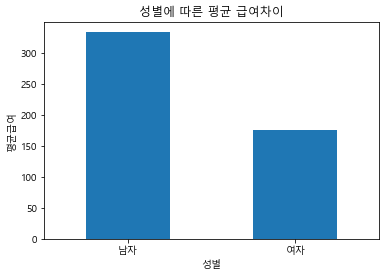

In [321]:
plt.figure()

gender_mean['일한달의 월 평균 임금'].plot(kind='bar',
                                rot=0)

plt.title('성별에 따른 평균 급여차이')
plt.xlabel('성별')
plt.ylabel('평균급여')

plt.show()
plt.close()

성별                  0
일한달의 월 평균 임금    10915
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


,일한달의 월 평균 임금
성별,
남자,333.422185
여자,176.359967


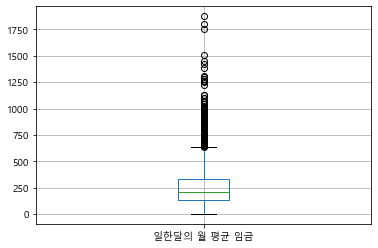

In [322]:
### 다른 방법

# 성별과 월급 데이터만 추출
gender_salary_df = subsetDF.filter(['성별', '일한달의 월 평균 임금'])
# display(gender_salary_df.head())

# 성별을 남자와 여자로 변환
gender_salary_df['성별'] = np.where(gender_salary_df['성별'] == 1 , '남자' , '여자')
# gender_salary_df.head()

# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
print(gender_salary_df.isna().sum())
gender_salary_df.dropna(inplace = True)
print("*" * 50)
print(gender_salary_df.isna().sum())

# 이상치 결측 처리
# 급여 범위를 벗어나면 nan 대체하고 결측치 처리 ~
gender_salary_df['일한달의 월 평균 임금'] = np.where(
    ((gender_salary_df['일한달의 월 평균 임금'] < 1) | ( gender_salary_df['일한달의 월 평균 임금'] > 9998)) ,
    np.nan , gender_salary_df['일한달의 월 평균 임금'] )
gender_salary_df.head()

gender_salary_df.boxplot()

# 데이터 분석(성별로 그룹화하여 그룹별 평균)
gender_salary_mean_df = gender_salary_df.groupby('성별').mean()
gender_salary_mean_df.head()


### 문제03
- 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화


In [323]:
subsetDF

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [324]:
from datetime import date, timedelta

In [325]:
import datetime

In [326]:
today = date.today()
today.year

2021

In [327]:
# 태어난 연도와 월급 데이터만 추출
year_salary_df = subsetDF.filter(['태어난 연도', '일한달의 월 평균 임금'])
display(year_salary_df.head())

# 성별을 남자와 여자로 변환
# gender_salary_df['성별'] = np.where(gender_salary_df['성별'] == 1 , '남자' , '여자')
# # gender_salary_df.head()

# # 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
# print(gender_salary_df.isna().sum())
# gender_salary_df.dropna(inplace = True)
# print("*" * 50)
# print(gender_salary_df.isna().sum())

# # 이상치 결측 처리
# # 급여 범위를 벗어나면 nan 대체하고 결측치 처리 ~
# gender_salary_df['일한달의 월 평균 임금'] = np.where(
#     ((gender_salary_df['일한달의 월 평균 임금'] < 1) | ( gender_salary_df['일한달의 월 평균 임금'] > 9998)) ,
#     np.nan , gender_salary_df['일한달의 월 평균 임금'] )
# gender_salary_df.head()

# gender_salary_df.boxplot()

# # 데이터 분석(성별로 그룹화하여 그룹별 평균)
# gender_salary_mean_df = gender_salary_df.groupby('성별').mean()
# gender_salary_mean_df.head()

,태어난 연도,일한달의 월 평균 임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN


In [328]:
year01 = year_salary_df.iloc[:,0]
age = today.year - year01 + 1

In [329]:
# age 컬럼 추가
year_salary_df['age'] = age
year_salary_df

,태어난 연도,일한달의 월 평균 임금,age
0,1936,NaN,86
1,1945,NaN,77
2,1948,NaN,74
3,1942,108.9,80
4,1923,NaN,99
...,...,...,...
15417,1967,NaN,55
15418,1992,NaN,30
15419,1995,72.0,27
15420,1998,NaN,24


In [330]:
# 결측치 확인
year_salary_df.isna().sum()
year_salary_df.dropna(inplace=True)
print(year_salary_df.isna().sum())

태어난 연도          0
일한달의 월 평균 임금    0
age             0
dtype: int64


In [331]:
year_salary_df

,태어난 연도,일한달의 월 평균 임금,age
3,1942,108.9,80
10,1940,20.0,82
16,1978,322.0,44
17,1975,120.0,47
24,1975,300.0,47
...,...,...,...
15400,1966,230.0,56
15401,1962,138.0,60
15404,1993,286.0,29
15412,1956,179.0,66


In [332]:
age_mean = year_salary_df.groupby('age').mean()
age_mean

,태어난 연도,일한달의 월 평균 임금
age,,
24,1998,89.333333
25,1997,136.720000
26,1996,140.807692
27,1995,138.000000
28,1994,145.652000
...,...,...
90,1932,21.200000
91,1931,25.000000
92,1930,20.000000


In [333]:
age_mean.index

Int64Index([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
            41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
            58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
            75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
            92, 94, 95],
           dtype='int64', name='age')

In [334]:
age_mean.values

array([[1998.        ,   89.33333333],
       [1997.        ,  136.72      ],
       [1996.        ,  140.80769231],
       [1995.        ,  138.        ],
       [1994.        ,  145.652     ],
       [1993.        ,  166.66666667],
       [1992.        ,  176.43934426],
       [1991.        ,  179.71647059],
       [1990.        ,  201.43815789],
       [1989.        ,  221.52643678],
       [1988.        ,  237.89021739],
       [1987.        ,  256.80350877],
       [1986.        ,  255.13448276],
       [1985.        ,  273.49054054],
       [1984.        ,  255.16944444],
       [1983.        ,  279.78681319],
       [1982.        ,  282.90165289],
       [1981.        ,  291.61494253],
       [1980.        ,  329.34807692],
       [1979.        ,  336.74298246],
       [1978.        ,  332.31747573],
       [1977.        ,  325.98653846],
       [1976.        ,  346.77068966],
       [1975.        ,  325.07328244],
       [1974.        ,  341.74964029],
       [1973.        ,  3

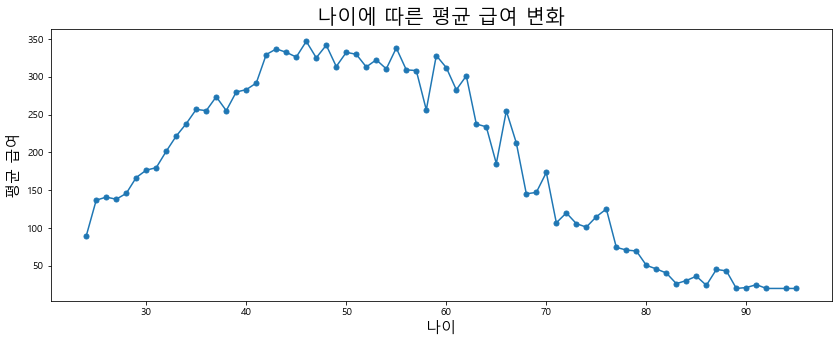

In [335]:
plt.figure(figsize=(14,5))

plt.plot(age_mean.index,age_mean['일한달의 월 평균 임금'],marker='o',
         markersize=5)

plt.title('나이에 따른 평균 급여 변화',size=20)
plt.xlabel('나이',size=15)
plt.ylabel('평균 급여',size=15)

plt.show()
plt.close()

### 문제
- 연령대에 따른 분포
- 연령대별 평균 급여 변화
- 성별과 연령대 분포
- 성별과 연령대에 따른 평균 급여 변화
- 지역별 연령층 분포와 연령층별 지역 비율


In [336]:
year_salary_df['age']

3        80
10       82
16       44
17       47
24       47
         ..
15400    56
15401    60
15404    29
15412    66
15419    27
Name: age, Length: 4507, dtype: int64

In [338]:
# 나이에 따른 연령대 컬럼 추가
year_salary_df['age02'] = year_salary_df['age'].apply(lambda x : '10대' if x < 20 
                                                      else ('20대' if x < 30
                                                           else ('30대' if x < 40
                                                                else ('40대' if x < 50
                                                                     else ('50대' if x < 60
                                                                            else ('60대' if x < 70
                                                                                 else ('70대' if x < 80
                                                                                      else ('80대' if x < 90 else '90대'))))))))

year_salary_df

,태어난 연도,일한달의 월 평균 임금,age,age02
3,1942,108.9,80,80대
10,1940,20.0,82,80대
16,1978,322.0,44,40대
17,1975,120.0,47,40대
24,1975,300.0,47,40대
...,...,...,...,...
15400,1966,230.0,56,50대
15401,1962,138.0,60,60대
15404,1993,286.0,29,20대
15412,1956,179.0,66,60대


In [348]:
year_salary_df.isna().sum()

태어난 연도          0
일한달의 월 평균 임금    0
age             0
age02           0
dtype: int64

In [344]:
age02_mean = year_salary_df.groupby('age02').mean()
age02_mean

,태어난 연도,일한달의 월 평균 임금,age
age02,,,
20대,1994.586387,148.008377,27.413613
30대,1987.414322,234.542583,34.585678
40대,1977.200689,323.173618,44.799311
50대,1967.971454,316.574567,54.028546
60대,1958.179126,243.790719,63.820874
70대,1948.092437,114.386275,73.907563
80대,1939.193182,39.289205,82.806818
90대,1930.700000,21.600000,91.300000


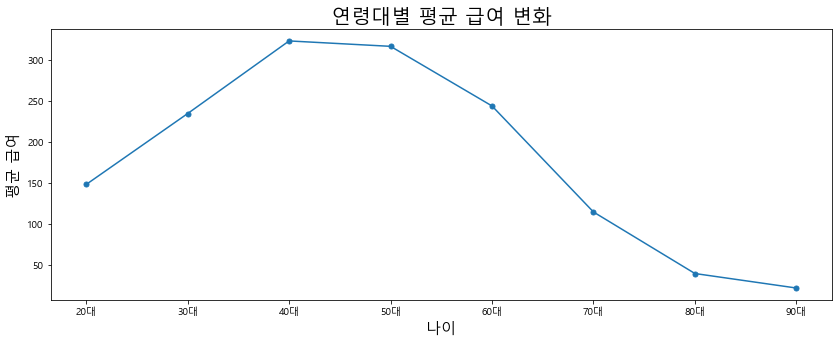

In [349]:
# 연령대별 평균 급여 변화
plt.figure(figsize=(14,5))

plt.plot(age02_mean.index,age02_mean['일한달의 월 평균 임금'],marker='o',
         markersize=5)

plt.title('연령대별 평균 급여 변화',size=20)
plt.xlabel('나이',size=15)
plt.ylabel('평균 급여',size=15)

plt.show()
plt.close()

In [358]:
display(subsetDF02)
display(year_salary_df)

,성별,일한달의 월 평균 임금,성별2
3,1,108.9,남자
10,2,20.0,여자
16,1,322.0,남자
17,2,120.0,여자
24,1,300.0,남자
...,...,...,...
15400,1,230.0,남자
15401,2,138.0,여자
15404,2,286.0,여자
15412,1,179.0,남자


,태어난 연도,일한달의 월 평균 임금,age,age02
3,1942,108.9,80,80대
10,1940,20.0,82,80대
16,1978,322.0,44,40대
17,1975,120.0,47,40대
24,1975,300.0,47,40대
...,...,...,...,...
15400,1966,230.0,56,50대
15401,1962,138.0,60,60대
15404,1993,286.0,29,20대
15412,1956,179.0,66,60대


In [364]:
gender_age = pd.merge(subsetDF02,year_salary_df)
gender_age = gender_age[['일한달의 월 평균 임금','성별2','age02']]
gender_age

,일한달의 월 평균 임금,성별2,age02
0,108.9,남자,80대
1,20.0,여자,80대
2,20.0,여자,80대
3,20.0,여자,70대
4,20.0,여자,80대
...,...,...,...
115548,952.0,남자,40대
115549,654.0,남자,50대
115550,842.0,남자,40대
115551,587.0,남자,50대


In [381]:
gender_age_mean = gender_age.groupby(['성별2','age02']).mean()
gender_age_mean

일한달의 월 평균 임금
성별2 age02              
남자  20대      166.344009
    30대      222.128377
    40대      270.021450
    50대      255.348085
    60대      211.892216
    70대       78.238559
    80대       25.606213
    90대       20.077519
여자  20대      142.003992
    30대      177.233348
    40대      181.834469
    50대      168.670170
    60대      148.062590
    70대       59.461338
    80대       24.516598
    90대       20.182488

In [372]:
gender_age_mean.index

MultiIndex([('남자', '20대'),
            ('남자', '30대'),
            ('남자', '40대'),
            ('남자', '50대'),
            ('남자', '60대'),
            ('남자', '70대'),
            ('남자', '80대'),
            ('남자', '90대'),
            ('여자', '20대'),
            ('여자', '30대'),
            ('여자', '40대'),
            ('여자', '50대'),
            ('여자', '60대'),
            ('여자', '70대'),
            ('여자', '80대'),
            ('여자', '90대')],
           names=['성별2', 'age02'])

In [373]:
gender_age_mean.values

array([[166.34400949],
       [222.1283774 ],
       [270.02145037],
       [255.34808541],
       [211.89221561],
       [ 78.23855856],
       [ 25.60621297],
       [ 20.07751938],
       [142.0039924 ],
       [177.23334775],
       [181.8344692 ],
       [168.67016959],
       [148.06259019],
       [ 59.46133792],
       [ 24.51659764],
       [ 20.18248848]])

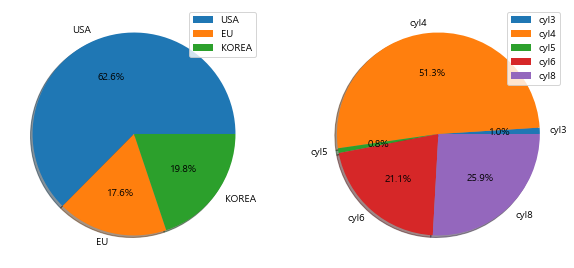

In [391]:
# fig = plt.figure(figsize=(10,15))

# ax01 = fig.add_subplot(1,2,1)
# ax02 = fig.add_subplot(1,2,2)


# ax01.pie(originDF['cnt'],
#        labels=originDF.index,
#        shadow=True,
#        autopct='%1.1f%%')

# ax02.pie(cylindersDF['cnt'],
#        labels=cylindersDF.index,
#        shadow=True,
#        autopct='%1.1f%%')

# ax01.legend(labels=originDF.index,loc='best')
# ax02.legend(labels=cylindersDF.index,loc='best')

# plt.show()
# plt.close()

In [389]:
loc_age = subsetDF[['태어난 연도','7개 권역별 지역구분']]
loc_age


year = loc_age.iloc[:,0]
age = today.year - year01 + 1

loc_age['age'] = age
loc_age


loc_age['연령층'] = loc_age['age'].apply(lambda x : '청년' if x < 30 
                                                      else ('중년' if x < 50
                                                           else '노년'))
loc_age

<ipython-input-389-3378620c00e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_age['age'] = age
<ipython-input-389-3378620c00e1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_age['연령층'] = loc_age['age'].apply(lambda x : '청년' if x < 30


,태어난 연도,7개 권역별 지역구분,age,연령층
0,1936,1,86,노년
1,1945,1,77,노년
2,1948,1,74,노년
3,1942,1,80,노년
4,1923,1,99,노년
...,...,...,...,...
15417,1967,5,55,노년
15418,1992,5,30,중년
15419,1995,5,27,청년
15420,1998,5,24,청년


In [402]:
loc_age.groupby('7개 권역별 지역구분').size()

7개 권역별 지역구분
1    2208
2    3492
3    2564
4    1874
5    1355
6    1180
7    2749
dtype: int64

In [397]:
plt.figure(figsize=(14,5))

loc_age.plot(kind='bar',
             loc_age['연령층'],loc_age['7개 권역별 지역구분'])

plt.title('연령대별 평균 급여 변화',size=20)
plt.xlabel('나이',size=15)
plt.ylabel('평균 급여',size=15)

plt.show()
plt.close()

SyntaxError: positional argument follows keyword argument (<ipython-input-397-dcbf463fe0ce>, line 4)

In [407]:
gender_year_df = subsetDF.filter(['성별','태어난 연도'])
gender_year_df['성별'] = np.where(subsetDF.filter(['성별']) == 1, '남자','여자')
gender_year_df

,성별,태어난 연도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923
...,...,...
15417,여자,1967
15418,여자,1992
15419,남자,1995
15420,여자,1998


In [408]:
# 연령대 계산
import datetime
gender_year_df['연령대'] = (datetime.datetime.now().year - gender_year_df['태어난 연도'] + 1) // 10 * 10
gender_year_df

,성별,태어난 연도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,80
4,여자,1923,90
...,...,...,...
15417,여자,1967,50
15418,여자,1992,30
15419,남자,1995,20
15420,여자,1998,20


### 이상치 정제

In [418]:
xls = pd.ExcelFile('./data/car_mpg.xlsx')
dataDF = xls.parse(xls.sheet_names[0])
dataDF

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [419]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [420]:
dataDF.shape

(234, 12)

In [421]:
dataDF.describe()

,Unnamed: 0,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,3.471795,2003.500000,5.888889,16.858974,23.440171
std,67.694165,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.000000,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,59.250000,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,117.500000,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,175.750000,4.600000,2008.000000,8.000000,19.000000,27.000000
max,234.000000,7.000000,2008.000000,8.000000,35.000000,44.000000


In [425]:
# 도시 연비와 고속도로 연비만 추출

outlierDF = dataDF.filter(['cty','hwy'])
outlierDF

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26
...,...,...
229,19,28
230,21,29
231,16,26
232,18,26


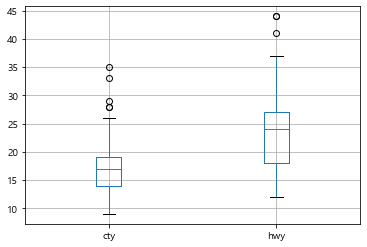

In [426]:
# 박스플롯으로 이상치 확인

plt.figure()

outlierDF.boxplot()

plt.show()
plt.close()

In [433]:
# 분위수의 정보를 얻고자 한다면?
quantile75 = outlierDF.quantile(q=0.75)
quantile75

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [434]:
quantile25 = outlierDF.quantile(q=0.25)
quantile25

cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [437]:
# IQR : 사분위수 범위 -> 3사분위 - 1사분위
# median : 중위수
lqr = quantile75 - quantile25
lqr

cty    5.0
hwy    9.0
dtype: float64

In [439]:
# lower fense(최저 한계치)
# upper fense(최고 한계치)

lower_fence = quantile25 - 1.5 * lqr
print('lower_fence : \n',lower_fence)
upper_fence = quantile75 + 1.5 * lqr
print('upper_fence : \n',upper_fence)


lower_fence : 
 cty    6.5
hwy    4.5
dtype: float64
upper_fence : 
 cty    26.5
hwy    40.5
dtype: float64


In [441]:
# 극단치 경계값(아래 수평선)

lower_outlier = outlierDF[outlierDF > lower_fence].min()
print('lower_outlier : \n',lower_outlier)

# 극단치 경계값(위 수평선)

upper_outlier = outlierDF[outlierDF < upper_fence].max()
print('upper_outlier : \n',upper_outlier)


lower_outlier : 
 cty     9
hwy    12
dtype: int64
upper_outlier : 
 cty    26.0
hwy    37.0
dtype: float64


In [454]:
# hwy 연비의 이상치 추출 - query 사용 (조건에 만족하는 행 출력)
# querty : str 과 str에 대한 함수 -> type casting 필요
# 이상치가 존재하는 인덱스 확인가능
hwy_outlier_df = dataDF.query('hwy > ' + str(upper_outlier['hwy']))
display(hwy_outlier_df)

# cty 연비의 이상치 추출
cty_outlier_df = dataDF.query('cty > ' + str(upper_outlier['cty']))
display(cty_outlier_df)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [457]:
# 변경 유무에 대한 비교를 위한 copy
cty_outlier_clean_df = cty_outlier_df.copy()

In [461]:
# 이상치 데이터 -> 결측값으로 변경 
# 평균값으로 결측값 대치
outlier_clean_df = dataDF.copy() # 원본 데이터 copy
# 도시 연비에 대한 이상치를 결측값으로 변경
for idx in cty_outlier_df.index :
    outlier_clean_df.loc[idx,'cty'] = np.nan
outlier_clean_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21.0,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19.0,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21.0,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16.0,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18.0,26,p,midsize


In [462]:
# hwy_outlier_clean_df = hwy_outlier_df.copy()

for idx in hwy_outlier_df.index :
    outlier_clean_df.loc[idx,'hwy'] = np.nan
outlier_clean_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18.0,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21.0,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20.0,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21.0,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16.0,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19.0,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21.0,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16.0,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18.0,26.0,p,midsize


In [464]:
# 결측값 확인
outlier_clean_df.filter(['cty','hwy']).isna().sum()

cty    5
hwy    3
dtype: int64

In [466]:
# 결측값 제거
# 구동방식(drv)에 따른 평균 연비
resultDF = outlier_clean_df.filter(['drv','cty','hwy']).dropna().groupby('drv').mean()
resultDF

,cty,hwy
drv,,
4,14.330097,19.174757
f,19.445545,27.584158
r,14.080000,21.000000


<Figure size 432x288 with 0 Axes>

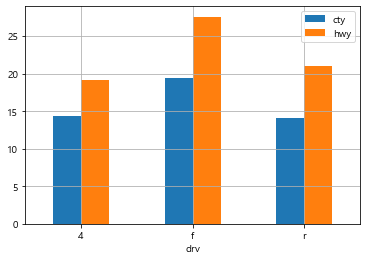

In [467]:
plt.figure()

resultDF.plot.bar(rot=0)
plt.grid()

plt.show()
plt.close()

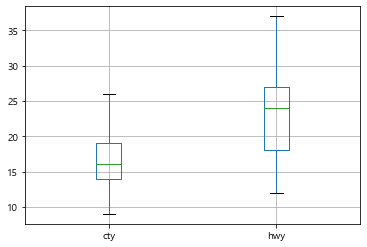

In [468]:
# 이상치 제거 확인
outlier_clean_df.filter(['cty','hwy']).boxplot()
plt.show()